In [3]:
# 데이터 EDA
# !mkdir ~/aiffel/jellyfish
# !pip install kaggle

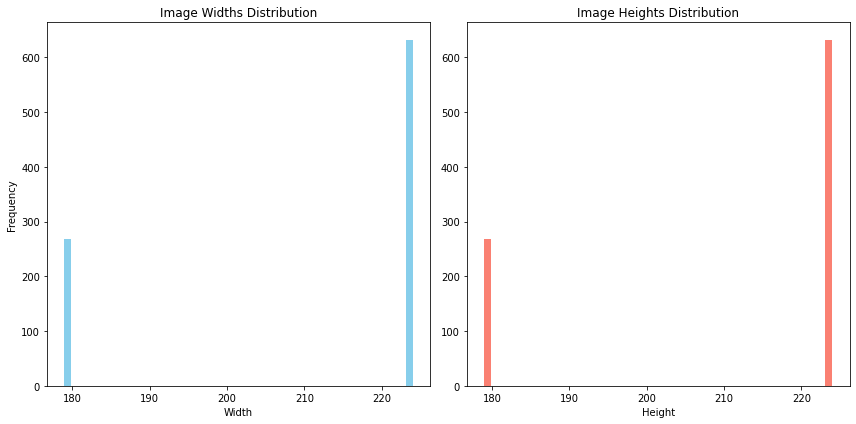

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Train 데이터셋이 있는 경로로 가정. 실제 경로로 변경.
train_data_dir = '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train'

# 이미지 크기를 저장할 리스트
image_sizes = []

# Train 데이터셋 안의 모든 해파리 종류의 폴더에 대해 반복
for jellyfish_type in os.listdir(train_data_dir):
    jellyfish_type_path = os.path.join(train_data_dir, jellyfish_type)
    # 각 해파리 종류 폴더 안의 이미지 파일들에 대해 반복
    for image_file in os.listdir(jellyfish_type_path):
        image_path = os.path.join(jellyfish_type_path, image_file)
        # 이미지를 열고 크기 정보를 가져옵니다.
        with Image.open(image_path) as img:
            image_sizes.append(img.size)

# 이미지 크기 분포를 분석하여 시각화합니다.
widths, heights = zip(*image_sizes)

plt.figure(figsize=(12, 6))

# 가로 크기 분포를 히스토그램으로 표시합니다.
plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='skyblue')
plt.title('Image Widths Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

# 세로 크기 분포를 히스토그램으로 표시합니다.
plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='salmon')
plt.title('Image Heights Distribution')
plt.xlabel('Height')

plt.tight_layout()
plt.show()

In [5]:
from collections import Counter

# 이미지 크기 데이터로부터 고유한 크기와 각 크기의 출현 횟수를 계산
size_counts = Counter(image_sizes)

# 고유한 크기와 출현 횟수를 출력
for size, count in size_counts.items():
    print(f"Size: {size}, Count: {count}")

Size: (224, 224), Count: 632
Size: (179, 179), Count: 268


In [6]:
# 모든 데이터 분포와 크기 확인하기
import os
from PIL import Image
from collections import Counter

# 데이터셋이 있는 기본 경로
base_dir = '/aiffel/aiffel/jellyfish/Train_Test_Valid'

# 이미지 크기를 저장할 리스트
all_image_sizes = []

# Train, Validation, Test 폴더에 대해 반복
for dataset_type in ['Train', 'valid', 'test']:
    dataset_path = os.path.join(base_dir, dataset_type)
    for jellyfish_type in os.listdir(dataset_path):
        jellyfish_type_path = os.path.join(dataset_path, jellyfish_type)
        for image_file in os.listdir(jellyfish_type_path):
            image_path = os.path.join(jellyfish_type_path, image_file)
            with Image.open(image_path) as img:
                all_image_sizes.append(img.size)

# 고유한 크기와 출현 횟수를 계산
size_counts = Counter(all_image_sizes)

# 고유한 크기와 출현 횟수를 출력
for size, count in size_counts.items():
    print(f"Size: {size}, Count: {count}")

Size: (224, 224), Count: 711
Size: (179, 179), Count: 268


In [7]:
# dir 확인까지 함수 처리
import os
from PIL import Image
from collections import defaultdict

def get_image_sizes(base_dir):
    all_image_sizes = defaultdict(list)

    # Train, Validation, Test 폴더에 대해 반복
    for dataset_type in ['Train', 'valid', 'test']:
        dataset_path = os.path.join(base_dir, dataset_type)
        for jellyfish_type in os.listdir(dataset_path):
            jellyfish_type_path = os.path.join(dataset_path, jellyfish_type)
            for image_file in os.listdir(jellyfish_type_path):
                image_path = os.path.join(jellyfish_type_path, image_file)
                with Image.open(image_path) as img:
                    all_image_sizes[img.size].append(image_path)

    return all_image_sizes

base_dir = '/aiffel/aiffel/jellyfish/Train_Test_Valid'
image_sizes = get_image_sizes(base_dir)
for size, paths in image_sizes.items():
    print(f"Size: {size}, Paths: {paths[:5]}")
    print()
    
# 각 경로마다 전부 섞여 있음 확인

Size: (224, 224), Paths: ['/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-9-12.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-67-13.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-40-51.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-24-30.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/65.jpg']

Size: (179, 179), Paths: ['/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-68-14.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-21-25.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-90-42.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-18-22.JPG', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-38-49.jpg']



In [8]:
# 라벨 분포 확인
from collections import Counter

# 라벨 분포를 저장할 카운터
label_counts = Counter()

# Train, Validation, Test 폴더에 대해 반복
for dataset_type in ['Train', 'valid', 'test']:
    dataset_path = os.path.join(base_dir, dataset_type)
    # 각 해파리 종류 폴더를 순회
    for jellyfish_type in os.listdir(dataset_path):
        jellyfish_type_path = os.path.join(dataset_path, jellyfish_type)
        # 각 폴더의 이미지 개수를 카운트하여 라벨 분포에 추가
        num_images = len([name for name in os.listdir(jellyfish_type_path) if os.path.isfile(os.path.join(jellyfish_type_path, name))])
        label_counts[jellyfish_type] += num_images

# 라벨 분포 출력
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")

Label: compass_jellyfish, Count: 164
Label: blue_jellyfish, Count: 164
Label: lions_mane_jellyfish, Count: 165
Label: barrel_jellyfish, Count: 160
Label: mauve_stinger_jellyfish, Count: 164
Label: Moon_jellyfish, Count: 162


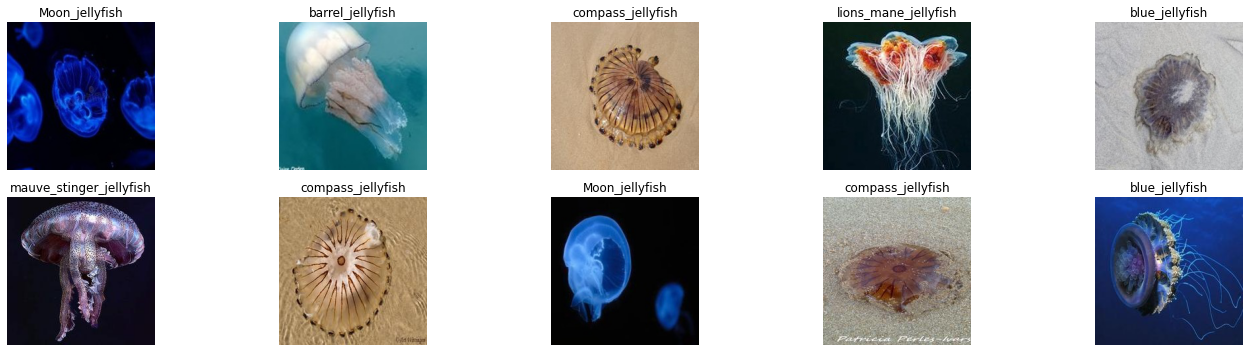

In [9]:
import random
# 라벨링 시각화 

def visualize_random_sample_images(base_dir, num_images=10):
    plt.figure(figsize=(20, 5))  # 너비는 20인치, 높이는 2인치로 설정합니다.
    
    # 모든 이미지 파일 경로를 저장할 리스트
    image_paths = []
    
    # 모든 클래스 폴더를 순회합니다.
    for class_name in os.listdir(os.path.join(base_dir, 'Train')):
        class_dir = os.path.join(base_dir, 'Train', class_name)
        # 해당 클래스의 모든 이미지 파일 경로를 리스트에 추가합니다.
        image_paths.extend([os.path.join(class_dir, file) for file in os.listdir(class_dir)])
    
    # 무작위로 이미지 파일 경로를 선택합니다.
    random_sample_paths = random.sample(image_paths, num_images)
    
    # 선택된 이미지 파일을 시각화합니다.
    for idx, image_path in enumerate(random_sample_paths):
        # 이미지를 불러옵니다.
        img = Image.open(image_path)
        # 이미지를 서브플롯에 그립니다.
        plt.subplot(2, num_images//2, idx + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(os.path.dirname(image_path)))
    
    plt.tight_layout()
    plt.show()

# 함수를 호출하여 무작위로 선택된 10개의 이미지를 시각화합니다.
visualize_random_sample_images(base_dir)

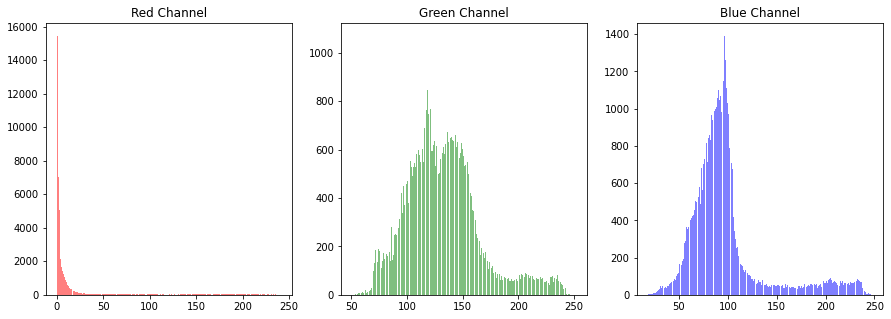

In [10]:
# 픽셀 값 분포 분석
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_image_pixel_distribution(image_path):
    # 이미지를 로드하고 RGB 값을 얻습니다.
    with Image.open(image_path) as img:
        img = img.convert('RGB')
        pixels = np.array(img)
        
    # RGB 채널을 분리합니다.
    r, g, b = pixels[:,:,0], pixels[:,:,1], pixels[:,:,2]
    
    # 각 채널에 대한 히스토그램을 생성합니다.
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    ax[0].hist(r.flatten(), bins=256, color='red', alpha=0.5)
    ax[0].set_title('Red Channel')
    
    ax[1].hist(g.flatten(), bins=256, color='green', alpha=0.5)
    ax[1].set_title('Green Channel')
    
    ax[2].hist(b.flatten(), bins=256, color='blue', alpha=0.5)
    ax[2].set_title('Blue Channel')
    
    plt.show()

# 예시 이미지의 경로
example_image_path = base_dir + '/Train/blue_jellyfish/17.jpg'

# 픽셀 값 분포를 시각화합니다.
plot_image_pixel_distribution(example_image_path)

# 대체적으로 Blue 계열이 많음 확인, Green도 많음 (바다 배경 색이 많음)
# 파일 15개 확인

In [11]:
# 이상치 탐지 (Outlier : 전반적 패턴에서 벗어나는 관측값)
# 라벨 잘못 지정
# 이미지 손상
# 특이한 이미지
import numpy as np
from PIL import Image
import os

# 이미지 픽셀 강도의 평균과 표준편차를 저장할 리스트
intensity_stats = []

# 이미지 데이터셋을 순회하며 픽셀 강도의 평균과 표준편차를 계산
for dataset_type in ['Train', 'valid', 'test']:
    dataset_path = os.path.join(base_dir, dataset_type)
    for jellyfish_type in os.listdir(dataset_path):
        jellyfish_type_path = os.path.join(dataset_path, jellyfish_type)
        for image_file in os.listdir(jellyfish_type_path):
            image_path = os.path.join(jellyfish_type_path, image_file)
            if os.path.isfile(image_path):  # 파일인지 확인
                with Image.open(image_path) as img:
                    img_array = np.array(img)
                    avg_intensity = np.mean(img_array)
                    std_intensity = np.std(img_array)
                    intensity_stats.append((image_path, avg_intensity, std_intensity))

# 평균의 두 배를 넘는 밝기를 이상치로 설정
avg_threshold = np.mean([stat[1] for stat in intensity_stats]) * 2 
 # 표준편차의 두 배를 넘는 변동을 이상치로 설정
std_threshold = np.mean([stat[2] for stat in intensity_stats]) * 2 

# 이상치로 의심되는 이미지 출력
outliers = [(path, avg, std) for path, avg, std in intensity_stats if avg > avg_threshold or std > std_threshold]
for outlier in outliers:
    print(f"Outlier detected: {outlier[0]}")
    print(f"Average Intensity: {outlier[1]}")
    print(f"Intensity StdDev: {outlier[2]}")
    print()
# 이상치가 너무 많음 확인

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-61-06.jpg
Average Intensity: 180.62722761461876
Intensity StdDev: 36.37232842824252

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/blue_jellyfish/29.jpg
Average Intensity: 189.32239184736395
Intensity StdDev: 35.19849338891111

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/blue_jellyfish/25.jpg
Average Intensity: 195.42322358630952
Intensity StdDev: 79.66836507852638

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/blue_jellyfish/aug-19-29.jpg
Average Intensity: 189.41067442602042
Intensity StdDev: 34.73327889105009

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/blue_jellyfish/aug-70-25.jpg
Average Intensity: 217.39431202168367
Intensity StdDev: 58.49630261889209

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/blue_jellyfish/aug-29-42.jpg
Average Intensity: 204.8914421237245
Intensity StdDev: 38.19930734

In [12]:
# 2. 데이터 프로세싱

In [13]:
# 이상치 조정, 리사이즈 및 색상 분포 균일화, 전처리 과정 총 함수
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageOps
from PIL import ImageEnhance
import numpy as np

def preprocess_image(image):
    # 이미지 데이터 타입을 uint8로 변환 (GoogleNet input shape 맞추기 위해)
    image = np.uint8(image)
    
    # PIL 이미지로 변환
    image = Image.fromarray(image)
    
    # 이상치 조정: 밝기
    enhancer = ImageEnhance.Brightness(image)
    target_brightness = 100  # 조정하려는 목표 밝기 (이상치 2배 설정 최소 177)
    # enhance(스케일 벡터, 인수로 1,0을 기준으로 밝기 조절, 목표밝기/기본 밝기 평균)
    image = enhancer.enhance(target_brightness / np.mean(image))
    
    # resize
    image = image.resize(output_size, Image.ANTIALIAS)
    
    # 색상 분포 균일화: 히스토그램 평활화, 우선 보류!했다가 투입!배제!
    image = ImageOps.equalize(image)

    return np.array(image)

# 원하는 출력 이미지 크기
output_size = (224, 224)

# 데이터 제너레이터 생성
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image,  # 전처리 함수 지정
    
    # Data Augmentation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 훈련 데이터셋에 대한 데이터 제너레이터 생성
train_generator = datagen.flow_from_directory(
    directory=base_dir + '/Train',
    target_size=output_size,
    batch_size=4,           # 배치 크기 변경해보면서 테스트!
    class_mode='categorical' # 자동 원핫 인코딩 변환(연산이 너무 많아지면 바꿔보자!)
)

# 검증 데이터셋에 대한 데이터 제너레이터 생성
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)
valid_generator = valid_datagen.flow_from_directory(
    directory=base_dir + '/valid',  # 검증 데이터셋 경로
    target_size=output_size,
    batch_size=1,
    class_mode='categorical'
)

# 테스트 데이터셋에 대한 데이터 제너레이터 생성
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)
test_generator = test_datagen.flow_from_directory(
    directory=base_dir + '/test',
    target_size=output_size,
    batch_size=1,
    class_mode='categorical',
    shuffle=False  # 평가 시에는 데이터를 섞지 않음
)

Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


In [14]:
# 3.모델

# 전이학습
# 2번- MobileNet 

# 3번- VGG16

# 4번- ResNet50V2

In [15]:
# 사전 훈련된 MobileNetV3 모델을 로드합니다.
from tensorflow.keras.applications import MobileNetV3Small  # 또는 MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
import math

# include_top=False로 설정하여 네트워크 최상단의 완전 연결 레이어를 제외합니다.
base_model = MobileNetV3Small(weights='imagenet', include_top=False)

# 특징 추출 부분 위에 새로운 레이어를 추가합니다.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

# 새로운 모델을 생성합니다.
model = Model(inputs=base_model.input, outputs=predictions)

# 사전 훈련된 레이어의 가중치를 고정하고, 새로 추가한 레이어만 훈련하도록 설정합니다.
# Fine_Tune
# 모델의 모든 레이어를 기본적으로 학습 불가능하게 설정
for layer in base_model.layers[:16]:
    layer.trainable = False

# 상위 15개 레이어만 학습 가능하게 설정
for layer in base_model.layers[16:]:
    layer.trainable = True
    
# 모델 요약
model.summary()

# LrS & Earlystopping
# 학습률을 조정하는 함수 정의
def scheduler(epoch, lr):
    if epoch%6==0:
        return lr
    else:
        return lr * math.exp(-0.05)

# 콜백 생성
lr_scheduler = LearningRateScheduler(scheduler,verbose=1)

# 조기 종료 콜백 생성
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, None, None, 1 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, None, None, 1 64          Conv[0][0]                       
______________________________________________________________________________________________

In [16]:
# 레이어 포지션체크, False가 사전훈련된 모델가중치 부하
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 Conv False
3 Conv/BatchNorm False
4 tf.__operators__.add False
5 re_lu False
6 tf.math.multiply False
7 multiply False
8 expanded_conv/depthwise/pad False
9 expanded_conv/depthwise False
10 expanded_conv/depthwise/BatchNorm False
11 re_lu_1 False
12 expanded_conv/squeeze_excite/AvgPool False
13 expanded_conv/squeeze_excite/Conv False
14 expanded_conv/squeeze_excite/Relu False
15 expanded_conv/squeeze_excite/Conv_1 False
16 tf.__operators__.add_1 True
17 re_lu_2 True
18 tf.math.multiply_1 True
19 expanded_conv/squeeze_excite/Mul True
20 expanded_conv/project True
21 expanded_conv/project/BatchNorm True
22 expanded_conv_1/expand True
23 expanded_conv_1/expand/BatchNorm True
24 re_lu_3 True
25 expanded_conv_1/depthwise/pad True
26 expanded_conv_1/depthwise True
27 expanded_conv_1/depthwise/BatchNorm True
28 re_lu_4 True
29 expanded_conv_1/project True
30 expanded_conv_1/project/BatchNorm True
31 expanded_conv_2/expand True
32 expanded_conv_2/expand/Batc

In [17]:
# 모델컴파인
model.compile(optimizer=Adam(learning_rate=0.00018), 
              loss='categorical_crossentropy', 
              metrics=['accuracy',Precision(), Recall()])

In [18]:
# 첫번째 배치 데이터를 가져오ㄱ
images, labels = next(iter(train_generator))

# 가져온 이미지의 형태와 타입을 출력합니다.
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")

Images batch shape: (4, 224, 224, 3)
Labels batch shape: (4, 6)


In [19]:
# 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.00018000000272877514.
225/225 [==============================] - 77s 312ms/step - loss: 1.3618 - accuracy: 0.4678 - precision: 0.7379 - recall: 0.2033 - val_loss: 1.0608 - val_accuracy: 0.6667 - val_precision: 0.7188 - val_recall: 0.5897
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.00017122129900581974.
225/225 [==============================] - 69s 308ms/step - loss: 0.7668 - accuracy: 0.7322 - precision: 0.8217 - recall: 0.6300 - val_loss: 1.2197 - val_accuracy: 0.5897 - val_precision: 0.6111 - val_recall: 0.5641
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.00016287073669487193.
225/225 [==============================] - 70s 309ms/step - loss: 0.5643 - accuracy: 0.8000 - precision: 0.8498 - recall: 0.7356 - val_loss: 0.8553 - val_accuracy: 0.7179 - val_precision: 0.7500 - val_recall: 0.6154
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning 

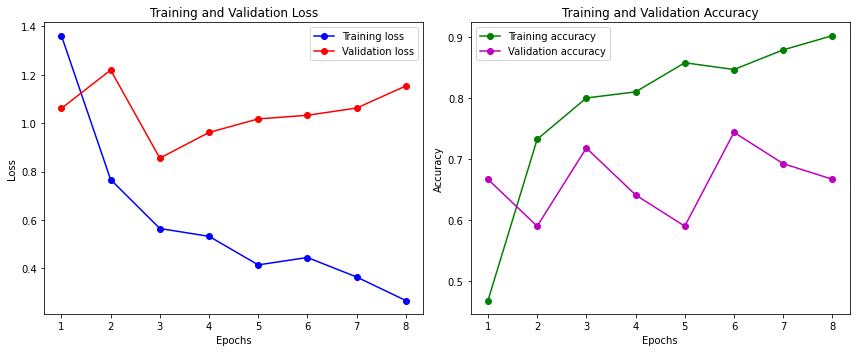

In [20]:
import matplotlib.pyplot as plt

# Extract loss, accuracy, and validation loss and accuracy from history
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Create epochs range
epochs = range(1, len(loss) + 1)

# Plot training loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'go-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'mo-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# 모델 평가
test_model = model.evaluate(test_generator)
print("Test :", test_model)

40/40 [==============================] - 1s 24ms/step - loss: 0.3372 - accuracy: 0.9000 - precision: 0.9211 - recall: 0.8750
Test : [0.33718955516815186, 0.8999999761581421, 0.9210526347160339, 0.875]


In [22]:
# 모델의 가중치를 저장 (추후에 테스트 시 어느정도 성능 나오면 저장)
model.save(base_dir+'/model_best_MobileNet.h5')
# test2 fit 2번 했더니 test4(그냥 성능 향상..뭘까?)

/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Create sweep with ID: e15e4n22
Sweep URL: https://wandb.ai/hyunwoo220/Jellyfish_classification/sweeps/e15e4n22


wandb: Agent Starting Run: k2oociyx with config:
wandb: 	epoch: 12
wandb: 	learning_rate: 1.8723690433337313e-05
wandb: Currently logged in as: hyunwoo220. Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/12

Epoch 00001: LearningRateScheduler setting learning rate to 1.8723691027844325e-05.
225/225 [==============================] - 78s 323ms/step - loss: 1.7783 - accuracy: 0.2133 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.8512 - val_accuracy: 0.2051 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best)... Done. 0.1s


Epoch 2/12

Epoch 00002: LearningRateScheduler setting learning rate to 1.781052584094554e-05.
225/225 [==============================] - 72s 320ms/step - loss: 1.6105 - accuracy: 0.3844 - precision: 0.6667 - recall: 0.0022 - val_loss: 1.6750 - val_accuracy: 0.3077 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best)... Done. 0.2s


Epoch 3/12

Epoch 00003: LearningRateScheduler setting learning rate to 1.694189602173223e-05.
225/225 [==============================] - 72s 320ms/step - loss: 1.4376 - accuracy: 0.5044 - precision: 0.8980 - recall: 0.0489 - val_loss: 1.4713 - val_accuracy: 0.4615 - val_precision: 1.0000 - val_recall: 0.0256
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best)... Done. 0.1s


Epoch 4/12

Epoch 00004: LearningRateScheduler setting learning rate to 1.6115630286064965e-05.
225/225 [==============================] - 72s 320ms/step - loss: 1.2646 - accuracy: 0.5600 - precision: 0.8571 - recall: 0.1800 - val_loss: 1.3395 - val_accuracy: 0.5897 - val_precision: 0.8571 - val_recall: 0.1538
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best)... Done. 0.1s


Epoch 5/12

Epoch 00005: LearningRateScheduler setting learning rate to 1.5329660953832754e-05.
225/225 [==============================] - 72s 320ms/step - loss: 1.1121 - accuracy: 0.6344 - precision: 0.8874 - recall: 0.2978 - val_loss: 1.2478 - val_accuracy: 0.6154 - val_precision: 0.8000 - val_recall: 0.2051
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best)... Done. 0.1s


Epoch 6/12

Epoch 00006: LearningRateScheduler setting learning rate to 1.4582024161499216e-05.
225/225 [==============================] - 72s 320ms/step - loss: 1.0359 - accuracy: 0.6567 - precision: 0.8431 - recall: 0.3822 - val_loss: 1.2031 - val_accuracy: 0.5641 - val_precision: 0.7500 - val_recall: 0.3077
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best)... Done. 0.1s


Epoch 7/12

Epoch 00007: LearningRateScheduler setting learning rate to 1.4582024050469045e-05.
225/225 [==============================] - 72s 319ms/step - loss: 0.9532 - accuracy: 0.6667 - precision: 0.8458 - recall: 0.4389 - val_loss: 1.2096 - val_accuracy: 0.5641 - val_precision: 0.7000 - val_recall: 0.3590
Epoch 8/12

Epoch 00008: LearningRateScheduler setting learning rate to 1.387085034558324e-05.
225/225 [==============================] - 72s 318ms/step - loss: 0.9050 - accuracy: 0.6844 - precision: 0.8256 - recall: 0.4944 - val_loss: 1.1649 - val_accuracy: 0.5641 - val_precision: 0.7727 - val_recall: 0.4359
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best)... Done. 0.1s


Epoch 9/12

Epoch 00009: LearningRateScheduler setting learning rate to 1.31943607821065e-05.
225/225 [==============================] - 72s 319ms/step - loss: 0.8411 - accuracy: 0.7100 - precision: 0.8444 - recall: 0.5489 - val_loss: 1.1426 - val_accuracy: 0.5897 - val_precision: 0.7391 - val_recall: 0.4359
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best)... Done. 0.1s


Epoch 10/12

Epoch 00010: LearningRateScheduler setting learning rate to 1.2550864126040966e-05.
225/225 [==============================] - 72s 320ms/step - loss: 0.7816 - accuracy: 0.7356 - precision: 0.8564 - recall: 0.5700 - val_loss: 1.1315 - val_accuracy: 0.5897 - val_precision: 0.6800 - val_recall: 0.4359
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best)... Done. 0.1s


Epoch 11/12

Epoch 00011: LearningRateScheduler setting learning rate to 1.1938751220480178e-05.
225/225 [==============================] - 72s 321ms/step - loss: 0.7578 - accuracy: 0.7500 - precision: 0.8686 - recall: 0.5878 - val_loss: 1.1208 - val_accuracy: 0.6154 - val_precision: 0.7083 - val_recall: 0.4359
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best)... Done. 0.1s


Epoch 12/12

Epoch 00012: LearningRateScheduler setting learning rate to 1.1356491636086753e-05.
225/225 [==============================] - 73s 323ms/step - loss: 0.7520 - accuracy: 0.7344 - precision: 0.8560 - recall: 0.6078 - val_loss: 1.1104 - val_accuracy: 0.5897 - val_precision: 0.7037 - val_recall: 0.4872
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_034604-k2oociyx/files/model-best)... Done. 0.1s


40/40 [==============================] - 2s 38ms/step - loss: 0.5318 - accuracy: 0.9000 - precision: 0.9412 - recall: 0.8000


Test Accuracy,▁
Test Loss,▁
Test Precision,▁
Test Recall,▁
accuracy,▁▃▅▆▆▇▇▇▇███
epoch,▁▂▂▃▄▄▅▅▆▇▇█
loss,█▇▆▄▃▃▂▂▂▁▁▁
lr,█▇▆▆▅▄▄▃▃▂▂▁
precision,▁▆█████▇████
recall,▁▁▂▃▄▅▆▇▇███
val_accuracy,▁▃▅██▇▇▇████


wandb: Agent Starting Run: weicrv4e with config:
wandb: 	epoch: 11
wandb: 	learning_rate: 1.8296138268026903e-05


Epoch 1/11

Epoch 00001: LearningRateScheduler setting learning rate to 1.829613756854087e-05.
225/225 [==============================] - 80s 330ms/step - loss: 1.8032 - accuracy: 0.2111 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.7645 - val_accuracy: 0.2308 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best)... Done. 0.2s


Epoch 2/11

Epoch 00002: LearningRateScheduler setting learning rate to 1.7403824409909025e-05.
225/225 [==============================] - 73s 324ms/step - loss: 1.7025 - accuracy: 0.3111 - precision: 1.0000 - recall: 0.0022 - val_loss: 1.6757 - val_accuracy: 0.3333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best)... Done. 0.1s


Epoch 3/11

Epoch 00003: LearningRateScheduler setting learning rate to 1.655503047755129e-05.
225/225 [==============================] - 73s 323ms/step - loss: 1.5875 - accuracy: 0.4067 - precision: 1.0000 - recall: 0.0178 - val_loss: 1.5862 - val_accuracy: 0.3846 - val_precision: 0.8000 - val_recall: 0.1026
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best)... Done. 0.1s


Epoch 4/11

Epoch 00004: LearningRateScheduler setting learning rate to 1.5747631674043235e-05.
225/225 [==============================] - 72s 321ms/step - loss: 1.4863 - accuracy: 0.4689 - precision: 0.9516 - recall: 0.0656 - val_loss: 1.4857 - val_accuracy: 0.5385 - val_precision: 0.6667 - val_recall: 0.1026
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best)... Done. 0.1s


Epoch 5/11

Epoch 00005: LearningRateScheduler setting learning rate to 1.497961049728493e-05.
225/225 [==============================] - 73s 325ms/step - loss: 1.3612 - accuracy: 0.5200 - precision: 0.8984 - recall: 0.1278 - val_loss: 1.3899 - val_accuracy: 0.5128 - val_precision: 0.6000 - val_recall: 0.1538
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best)... Done. 0.1s


Epoch 6/11

Epoch 00006: LearningRateScheduler setting learning rate to 1.4249046340646085e-05.
225/225 [==============================] - 73s 326ms/step - loss: 1.2627 - accuracy: 0.5589 - precision: 0.9016 - recall: 0.1833 - val_loss: 1.3024 - val_accuracy: 0.5385 - val_precision: 0.7692 - val_recall: 0.2564
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best)... Done. 0.1s


Epoch 7/11

Epoch 00007: LearningRateScheduler setting learning rate to 1.4249046216718853e-05.
225/225 [==============================] - 73s 326ms/step - loss: 1.1516 - accuracy: 0.5911 - precision: 0.8782 - recall: 0.2644 - val_loss: 1.2353 - val_accuracy: 0.5128 - val_precision: 0.7692 - val_recall: 0.2564
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best)... Done. 0.1s


Epoch 8/11

Epoch 00008: LearningRateScheduler setting learning rate to 1.3554112032413551e-05.
225/225 [==============================] - 72s 322ms/step - loss: 1.0435 - accuracy: 0.6122 - precision: 0.8652 - recall: 0.3422 - val_loss: 1.1502 - val_accuracy: 0.5897 - val_precision: 0.8000 - val_recall: 0.3077
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best)... Done. 0.1s


Epoch 9/11

Epoch 00009: LearningRateScheduler setting learning rate to 1.2893070375238848e-05.
225/225 [==============================] - 72s 321ms/step - loss: 1.0071 - accuracy: 0.6556 - precision: 0.8568 - recall: 0.3922 - val_loss: 1.0897 - val_accuracy: 0.5897 - val_precision: 0.7059 - val_recall: 0.3077
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best)... Done. 0.1s


Epoch 10/11

Epoch 00010: LearningRateScheduler setting learning rate to 1.2264268090171305e-05.
225/225 [==============================] - 73s 323ms/step - loss: 0.9048 - accuracy: 0.7044 - precision: 0.8817 - recall: 0.4722 - val_loss: 1.0673 - val_accuracy: 0.6667 - val_precision: 0.8333 - val_recall: 0.3846
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best)... Done. 0.1s


Epoch 11/11

Epoch 00011: LearningRateScheduler setting learning rate to 1.1666132356105573e-05.
225/225 [==============================] - 72s 319ms/step - loss: 0.8297 - accuracy: 0.7322 - precision: 0.8897 - recall: 0.5289 - val_loss: 1.0349 - val_accuracy: 0.6667 - val_precision: 0.8571 - val_recall: 0.4615
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_040640-weicrv4e/files/model-best)... Done. 0.1s


40/40 [==============================] - 1s 25ms/step - loss: 0.6289 - accuracy: 0.7750 - precision: 0.8966 - recall: 0.6500


Test Accuracy,▁
Test Loss,▁
Test Precision,▁
Test Recall,▁
accuracy,▁▂▄▄▅▆▆▆▇██
epoch,▁▂▂▃▄▅▅▆▇▇█
loss,█▇▆▆▅▄▃▃▂▂▁
lr,█▇▆▅▄▄▄▃▂▂▁
precision,▁███▇▇▇▇▇▇▇
recall,▁▁▁▂▃▃▅▆▆▇█
val_accuracy,▁▃▃▆▆▆▆▇▇██


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 89qg2vma with config:
wandb: 	epoch: 17
wandb: 	learning_rate: 1.6105770714643658e-05


Epoch 1/17

Epoch 00001: LearningRateScheduler setting learning rate to 1.6105770555441268e-05.
225/225 [==============================] - 81s 326ms/step - loss: 1.7683 - accuracy: 0.2444 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.8532 - val_accuracy: 0.2051 - val_precision: 0.5000 - val_recall: 0.0256
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 2/17

Epoch 00002: LearningRateScheduler setting learning rate to 1.532028285659294e-05.
225/225 [==============================] - 72s 320ms/step - loss: 1.6304 - accuracy: 0.3289 - precision: 1.0000 - recall: 0.0122 - val_loss: 1.7097 - val_accuracy: 0.2821 - val_precision: 0.6667 - val_recall: 0.0513
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 3/17

Epoch 00003: LearningRateScheduler setting learning rate to 1.4573104587463933e-05.
225/225 [==============================] - 72s 322ms/step - loss: 1.5109 - accuracy: 0.4022 - precision: 0.8696 - recall: 0.0444 - val_loss: 1.6027 - val_accuracy: 0.4103 - val_precision: 0.6250 - val_recall: 0.1282
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.2s


Epoch 4/17

Epoch 00004: LearningRateScheduler setting learning rate to 1.38623659360232e-05.
225/225 [==============================] - 73s 325ms/step - loss: 1.4135 - accuracy: 0.4544 - precision: 0.8288 - recall: 0.1022 - val_loss: 1.4813 - val_accuracy: 0.5128 - val_precision: 0.6667 - val_recall: 0.1538
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 5/17

Epoch 00005: LearningRateScheduler setting learning rate to 1.318629077370678e-05.
225/225 [==============================] - 73s 322ms/step - loss: 1.2971 - accuracy: 0.5256 - precision: 0.8425 - recall: 0.1367 - val_loss: 1.3958 - val_accuracy: 0.5385 - val_precision: 0.7000 - val_recall: 0.1795
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 6/17

Epoch 00006: LearningRateScheduler setting learning rate to 1.2543187755486644e-05.
225/225 [==============================] - 72s 321ms/step - loss: 1.2033 - accuracy: 0.5856 - precision: 0.8571 - recall: 0.2000 - val_loss: 1.3342 - val_accuracy: 0.5641 - val_precision: 0.6667 - val_recall: 0.2051
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 7/17

Epoch 00007: LearningRateScheduler setting learning rate to 1.2543187949631829e-05.
225/225 [==============================] - 73s 322ms/step - loss: 1.1495 - accuracy: 0.5911 - precision: 0.8409 - recall: 0.2467 - val_loss: 1.2721 - val_accuracy: 0.5641 - val_precision: 0.6923 - val_recall: 0.2308
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 8/17

Epoch 00008: LearningRateScheduler setting learning rate to 1.1931449454732575e-05.
225/225 [==============================] - 72s 322ms/step - loss: 1.0357 - accuracy: 0.6400 - precision: 0.8732 - recall: 0.3444 - val_loss: 1.2142 - val_accuracy: 0.6154 - val_precision: 0.7222 - val_recall: 0.3333
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.2s


Epoch 9/17

Epoch 00009: LearningRateScheduler setting learning rate to 1.134954544210719e-05.
225/225 [==============================] - 72s 319ms/step - loss: 0.9786 - accuracy: 0.6833 - precision: 0.8458 - recall: 0.4267 - val_loss: 1.1719 - val_accuracy: 0.6410 - val_precision: 0.7895 - val_recall: 0.3846
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 10/17

Epoch 00010: LearningRateScheduler setting learning rate to 1.0796021420427821e-05.
225/225 [==============================] - 72s 322ms/step - loss: 0.9184 - accuracy: 0.6756 - precision: 0.8415 - recall: 0.4600 - val_loss: 1.1404 - val_accuracy: 0.6410 - val_precision: 0.7500 - val_recall: 0.4615
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 11/17

Epoch 00011: LearningRateScheduler setting learning rate to 1.026949316869966e-05.
225/225 [==============================] - 73s 325ms/step - loss: 0.8463 - accuracy: 0.7078 - precision: 0.8767 - recall: 0.5133 - val_loss: 1.1215 - val_accuracy: 0.6410 - val_precision: 0.7500 - val_recall: 0.4615
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 12/17

Epoch 00012: LearningRateScheduler setting learning rate to 9.768643946701399e-06.
225/225 [==============================] - 73s 323ms/step - loss: 0.8267 - accuracy: 0.7233 - precision: 0.8664 - recall: 0.5622 - val_loss: 1.0925 - val_accuracy: 0.6667 - val_precision: 0.8000 - val_recall: 0.5128
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 13/17

Epoch 00013: LearningRateScheduler setting learning rate to 9.768644304131158e-06.
225/225 [==============================] - 73s 326ms/step - loss: 0.8015 - accuracy: 0.7356 - precision: 0.8770 - recall: 0.5544 - val_loss: 1.0717 - val_accuracy: 0.7179 - val_precision: 0.8077 - val_recall: 0.5385
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 14/17

Epoch 00014: LearningRateScheduler setting learning rate to 9.292221899570858e-06.
225/225 [==============================] - 73s 324ms/step - loss: 0.8107 - accuracy: 0.7211 - precision: 0.8729 - recall: 0.5800 - val_loss: 1.0586 - val_accuracy: 0.7179 - val_precision: 0.8000 - val_recall: 0.5128
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 15/17

Epoch 00015: LearningRateScheduler setting learning rate to 8.839034866976264e-06.
225/225 [==============================] - 73s 326ms/step - loss: 0.7464 - accuracy: 0.7589 - precision: 0.8750 - recall: 0.6222 - val_loss: 1.0574 - val_accuracy: 0.7179 - val_precision: 0.7917 - val_recall: 0.4872
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 16/17

Epoch 00016: LearningRateScheduler setting learning rate to 8.407950383116239e-06.
225/225 [==============================] - 73s 324ms/step - loss: 0.7326 - accuracy: 0.7467 - precision: 0.8609 - recall: 0.6256 - val_loss: 1.0493 - val_accuracy: 0.7179 - val_precision: 0.8000 - val_recall: 0.5128
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


Epoch 17/17

Epoch 00017: LearningRateScheduler setting learning rate to 7.997889620752954e-06.
225/225 [==============================] - 74s 328ms/step - loss: 0.7029 - accuracy: 0.7733 - precision: 0.8735 - recall: 0.6367 - val_loss: 1.0323 - val_accuracy: 0.6923 - val_precision: 0.8333 - val_recall: 0.5128
INFO:tensorflow:Assets written to: /aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/wandb/run-20231122_042651-89qg2vma/files/model-best)... Done. 0.1s


40/40 [==============================] - 1s 34ms/step - loss: 0.5304 - accuracy: 0.8500 - precision: 0.9375 - recall: 0.7500


Test Accuracy,▁
Test Loss,▁
Test Precision,▁
Test Recall,▁
accuracy,▁▂▃▄▅▆▆▆▇▇▇▇▇▇███
epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
loss,█▇▆▆▅▄▄▃▃▂▂▂▂▂▁▁▁
lr,█▇▇▆▅▅▅▄▄▃▃▃▃▂▂▁▁
precision,▁█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
recall,▁▁▁▂▃▃▄▅▆▆▇▇▇▇███
val_accuracy,▁▂▄▅▆▆▆▇▇▇▇▇█████
